## This notebook includes downstream processing and visualisation of population WGS DUX4 data
The notebook uses bamscale output (FPKM-adjusted) DUX4 counts to visualise population-wise differences in the terminal 4q DUX4 unit (which contains introns in the T2T reference)

In [ ]:
# import needed packages
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [ ]:
# define the path to the coverage tsv files
tdir = "/lustre/scratch126/casm/team274sb/lr26/population_dux/bamscale_output"
files = glob.glob(os.path.join(tdir, "*FPKM_coverages.tsv"))

# initialize a list which will hold the sample and value for dux4
rows = []

for filepath in files:
    # extract the sample name from the filepath and add dux4_ before them 
    basename = os.path.basename(filepath)
    sample = basename.replace(".sample.dupmarked_t2t.sorted.FPKM_coverages.tsv", "").replace("dux4_", "")
    
    # then read in the values (FPKM which works better)
    df = pd.read_csv(filepath, sep="\t")
    value = df.iloc[0, 1]  # 2nd column, first row
    # and append to the list
    rows.append((sample, value))

# then create a dataframe out of the sample and counts and save it as the summary
df = pd.DataFrame(rows, columns=["sample", "FPKM"])

# Save to TSV
output_path = os.path.join(tdir, "dux4_FPKM_summary.tsv")
df.to_csv(output_path, sep="\t", index=False)

In [ ]:
counts = pd.read_csv("/lustre/scratch126/casm/team274sb/lr26/population_dux/bamscale_output/dux4_FPKM_summary.tsv", sep = "\t")
counts

,sample,FPKM
0,PD40713d,33.586567
1,PD45590d,136.004929
2,PD48719b,49.147251
3,PD45569e,121.394844
4,PD48706b,40.194836
...,...,...
289,PD49215b,53.059090
290,PD45573d,102.288025
291,PD45681b,3.615510
292,PD48715b,33.148636


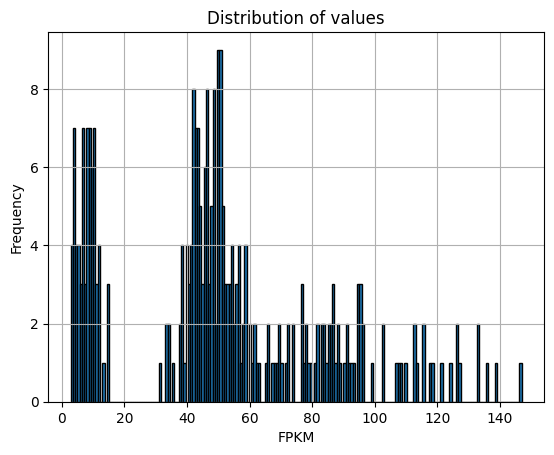

In [ ]:
# then plot the counts
counts["FPKM"].plot(kind="hist", bins=200, edgecolor="black")
plt.xlabel("FPKM")
plt.ylabel("Frequency")
plt.title("Distribution of values")
plt.grid(True)
plt.show()

In [ ]:
# then also point out which is the population with the unusually low FPKM count
sample_list = counts[counts["FPKM"] < 20]["sample"].tolist()
sample_list.sort()
print(sample_list)

['PD31012b', 'PD34956b', 'PD36156b', 'PD36158b', 'PD36167b', 'PD41847b', 'PD42139b', 'PD42167b', 'PD45549d', 'PD45549e', 'PD45549f', 'PD45551b', 'PD45551c', 'PD45551f', 'PD45552c', 'PD45552d', 'PD45552f', 'PD45553b', 'PD45553c', 'PD45553f', 'PD45556b', 'PD45556e', 'PD45556f', 'PD45558c', 'PD45558e', 'PD45558f', 'PD45565c', 'PD45565e', 'PD45565f', 'PD45568b', 'PD45568e', 'PD45568f', 'PD45580c', 'PD45580d', 'PD45580f', 'PD45581e', 'PD45581f', 'PD45597b', 'PD45601b', 'PD45603b', 'PD45609b', 'PD45615b', 'PD45621b', 'PD45643b', 'PD45645b', 'PD45653b', 'PD45665b', 'PD45669b', 'PD45681b', 'PD46692b', 'PD47706b', 'PD48688b', 'PD48692b', 'PD48709b', 'PD49173b', 'PD49174b', 'PD49183b', 'PD49209b', 'PD49210b', 'PD49213b', 'PD49214b', 'PD50593b', 'PD50602b', 'PD50667b', 'PD50715b', 'PD50716b', 'PD50719b', 'PD53640d', 'PD54858b', 'PD54858d']
